In [ ]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages.utils import trim_messages, count_tokens_approximately
from dotenv import load_dotenv

In [15]:
load_dotenv()

True

In [16]:
llm = ChatGroq(model="openai/gpt-oss-120b")

In [17]:
MAX_TOKENS = 150

In [18]:
def call_model(state: MessagesState):
    
    # Trim conversation history -> last N messages that fit within the token budget
    messages = trim_messages(
        state["messages"],
        strategy="last",                      
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )

    print('Current Token Count ->', count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = llm.invoke(messages)

    return {"messages": [response]}

In [19]:
builder = StateGraph(MessagesState)

builder.add_node("call_model", call_model)

builder.add_edge(START, "call_model")
builder.add_edge("call_model", END)

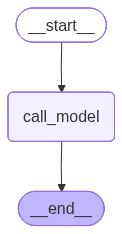

In [20]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)
graph

In [21]:
config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Hi, my name is Hamza."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 10
Hi, my name is Hamza.


'Hello Hamza! Nice to meet you. How can I assist you today?'

In [22]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 40
Hi, my name is Hamza.
Hello Hamza! Nice to meet you. How can I assist you today?
I am learning LangGraph.


'Great! LangGraph is a powerful framework for building composable, multi‑step LLM applications (agents, workflows, tool‑calling pipelines, etc.). Here’s a quick roadmap to get you up to speed, plus some resources and tips you can dive into right away.\n\n---\n\n## 1️⃣ Core Concepts at a Glance\n\n| Concept | What It Is | Why It Matters |\n|---------|------------|----------------|\n| **Node** | A single “step” in a graph—usually a call to an LLM, a tool, or some custom Python function. | Encapsulates a piece of logic that can be reused. |\n| **Edge** | The directed connection between nodes, often conditional (e.g., based on the LLM’s output). | Determines the flow of control and data. |\n| **State** | A mutable dictionary (`state`) that travels with the execution, holding inputs, intermediate results, and metadata. | Lets downstream nodes read/write information without global variables. |\n| **Graph** | The full DAG (or more general graph) that ties nodes and edges together. | Represent

In [23]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "Can you explain short term memory?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 13
Can you explain short term memory?


'### Short‑Term Memory (STM) – A Quick Overview\n\n**Short‑term memory** is the brain’s “mental notepad” that holds a small amount of information for a brief period—typically seconds to a few minutes—while we’re actively using it. It’s essential for everyday tasks like remembering a phone number long enough to dial it, keeping track of the items on a shopping list while you walk through the store, or following a conversation.\n\nBelow is a concise guide covering the key features, underlying mechanisms, and how STM fits into the broader memory system.\n\n---\n\n## 1. Core Characteristics\n\n| Feature | Typical Value | What It Means |\n|---------|---------------|---------------|\n| **Capacity** | 4–9 “chunks” of information (Miller’s classic 7\u202f±\u202f2) | A *chunk* can be a single digit, a word, or a meaningful group (e.g., “New\u202fYork” counts as one chunk). |\n| **Duration** | ~15–30\u202fseconds without rehearsal | If you don’t actively repeat or rehearse the info, it fades qui

In [24]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 8
What is my name?


'I don’t actually know your name—could you let me know what you’d like me to call you?'

In [25]:
for item in graph.get_state({"configurable": {"thread_id": "chat-1"}}).values['messages']:
    print(item.content)
    print('-'*120)

Hi, my name is Hamza.
------------------------------------------------------------------------------------------------------------------------
Hello Hamza! Nice to meet you. How can I assist you today?
------------------------------------------------------------------------------------------------------------------------
I am learning LangGraph.
------------------------------------------------------------------------------------------------------------------------
Great! LangGraph is a powerful framework for building composable, multi‑step LLM applications (agents, workflows, tool‑calling pipelines, etc.). Here’s a quick roadmap to get you up to speed, plus some resources and tips you can dive into right away.

---

## 1️⃣ Core Concepts at a Glance

| Concept | What It Is | Why It Matters |
|---------|------------|----------------|
| **Node** | A single “step” in a graph—usually a call to an LLM, a tool, or some custom Python function. | Encapsulates a piece of logic that can be reused